[![Commits since latest release][gh-image]][gh-link]

[gh-link]: https://github.com/claudioperez/elle-0002/compare/v0.0.0...master
[gh-image]: https://img.shields.io/github/commits-since/claudioperez/elle-0002/v0.0.0?style=social

In [1]:
import emme as em
import elle.truss2d
import numpy as anp

<AxesSubplot:>

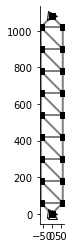

In [2]:
model = em.SkeletalModel(2,2)
# Define parameters
E = [
    29e3,
    29e3,
]
F = 40.0

X =  [-60.06,59.95,-59.88,60.07,-59.80,60.02,-59.71,60.00,-59.65,59.98,-59.71,60.00,-59.80,60.02,-59.88,60.07,-60.06, 59.95]

Y = anp.cumsum(anp.array([5.0] + [10.0]*8 + [5.0])) * 12.0

#--------------------------------------------------------------------
# Add nodes to model
#--------------------------------------------------------------------
model.node( "1", 0.0,   0.0)
model.node("20", 0.0, Y[-1])
for i in range(1,19):
    model.node(str(i+1), X[i-1], Y[(i//2,(i+1)//2)[i%2]-1])
model.boun( '1', [1,1])
model.boun('20', [1,0])

properties = [
    dict(A=1.590,E=E[1]),
    dict(A=0.938,E=E[0]),
]

#--------------------------------------------------------------------
# Add elements to model
#--------------------------------------------------------------------
for i in range(1,19):
    model.truss('el-'+str(i*2-2+1*(i==1)),  str(  i), str(i+1), **properties[i!=1])
    if i-1:  model.truss( 'el-'+str(i*2-1), str(i-1), str(i+1), **properties[i==1])
i += 1

model.truss('el-'+str(i*2-2), str(  i), str(i+1), **properties[0])
model.truss('el-'+str(i*2-1), str(i-1), str(i+1), **properties[0])

model.load("10", F, dof="x")
# model.load("10", 20.0, dof="y")
em.plot_structure(model);

In [4]:
f = model.compose()
f()

DeviceArray([[-3.56618057e-03],
             [ 5.42765924e-01],
             [ 5.06451996e-01],
             [ 5.86990613e-01],
             [-5.49745977e-01],
             [ 1.86617811e+00],
             [ 4.78444235e-01],
             [ 1.95432604e+00],
             [-4.73006480e-01],
             [ 3.07800289e+00],
             [ 3.99529585e-01],
             [ 3.16635669e+00],
             [-3.42182338e-01],
             [ 4.02885953e+00],
             [ 2.68497236e-01],
             [ 4.11708099e+00],
             [-1.59409493e-01],
             [ 4.61333920e+00],
             [ 8.55905452e-02],
             [ 4.52525009e+00],
             [ 7.56054756e-02],
             [ 4.04883947e+00],
             [-1.49638724e-01],
             [ 3.96054082e+00],
             [ 2.58313984e-01],
             [ 3.11776927e+00],
             [-3.32951563e-01],
             [ 3.02948900e+00],
             [ 3.88788261e-01],
             [ 1.92569824e+00],
             [-4.64065460e-01],
        

In [ ]:
for Fi in [30.0, 4.0, 20.0]:
    print(f())

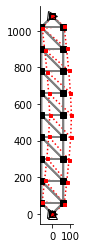

In [5]:
em.plot_displ(model, f());